In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
sns.set_style('darkgrid')


In [3]:
train_data=pd.read_csv('/content/train (1).csv')
train_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
test_data=pd.read_csv('/content/test (1).csv')
test_data.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

#Preprossing

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [7]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
train_data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [10]:
test_data.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [11]:
test_data.drop('id',axis=1,inplace=True)
test_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In [12]:
df1 = train_data.iloc[:, :10]  # Create a new DataFrame 'df1' containing the first 10 columns of 'train_data'
df1['price_range'] = train_data['price_range']  # Add the 'price_range' column from 'train_data' to 'df1'

df1.head()  # Display the first 5 rows of the new DataFrame 'df1'

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  price_range  
0        188        2            1  
1        136        3            2  
2        145        5            2  
3        131        6            2  
4        141        2            1


#visualizion
---



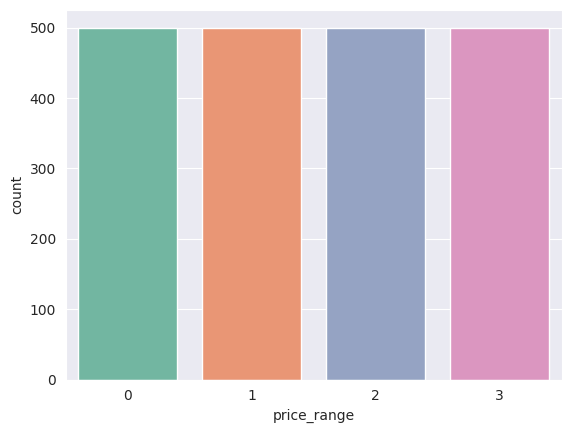

In [14]:
# Create a countplot is balanced data
sns.countplot(x='price_range',data=train_data,palette='Set2')
plt.show()

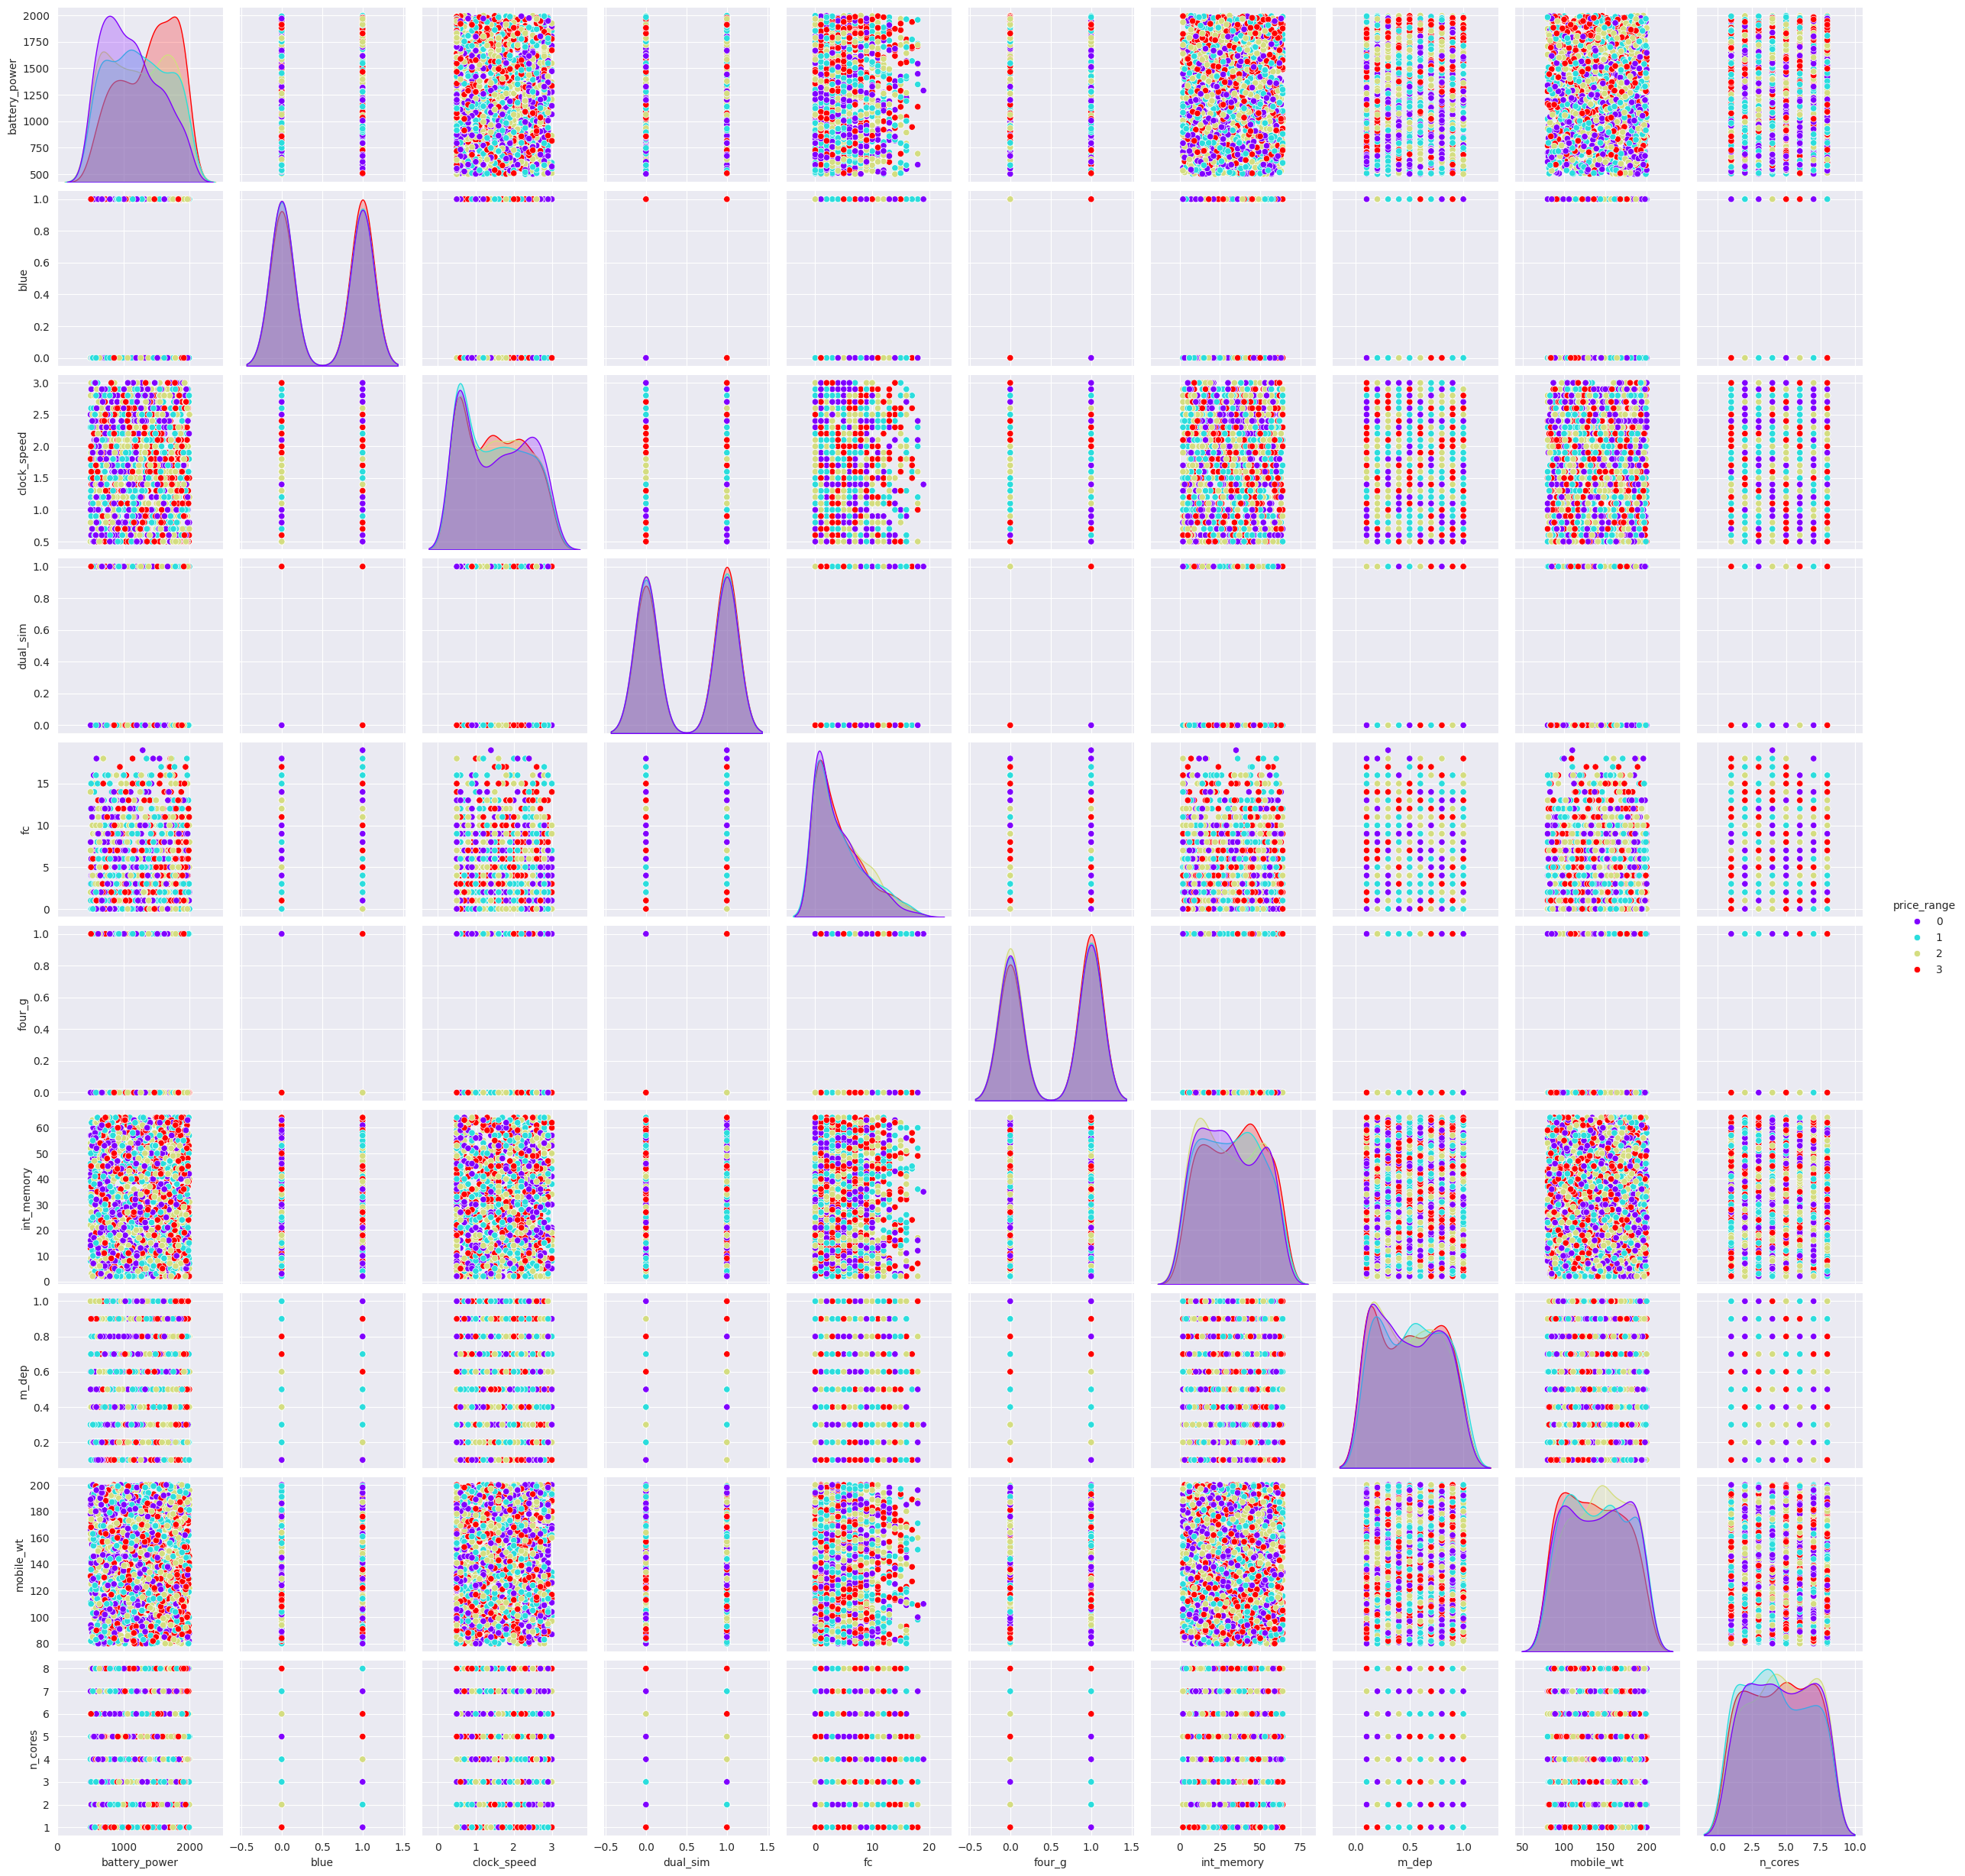

In [16]:
sns.pairplot(df1,hue='price_range',palette='rainbow')
plt.show()

#Correlation:
 Is there a clear relationship between internal memory and mobile weight? Does it appear positive (increasing together), negative (one increasing while the other decreases), or no correlation?
Price Range Clusters: Do phones within specific price ranges tend to cluster in certain areas of the plot? This could indicate that internal memory and mobile weight are factors in determining price range.
Outliers: Are there any outlier points that stand out from the general trend? These might be worth investigating further.

<Axes: xlabel='int_memory', ylabel='mobile_wt'>

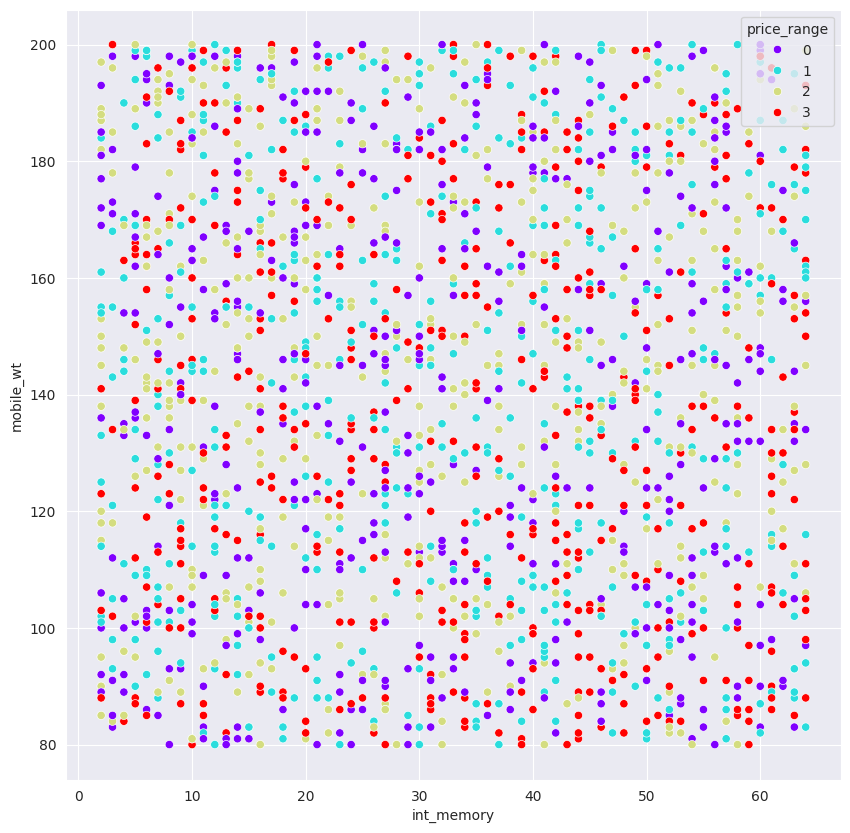

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='int_memory',y='mobile_wt',data=train_data,hue='price_range',palette='rainbow')
#

In [18]:
df2 = train_data.iloc[:, 10:]  # Create a new DataFrame 'df2' containing columns from index 10 onwards
df2['price_range'] = train_data['price_range']  # Add the 'price_range' column from 'train_data' to 'df2'

df2.head()  # Display the first 5 rows of the new DataFrame 'df2'

pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0   2         20       756  2549     9     7         19        0   
1   6        905      1988  2631    17     3          7        1   
2   6       1263      1716  2603    11     2          9        1   
3   9       1216      1786  2769    16     8         11        1   
4  14       1208      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  
0             0     1            1  
1             1     0            2  
2             1     0            2  
3             0     0            2  
4             1     0            1

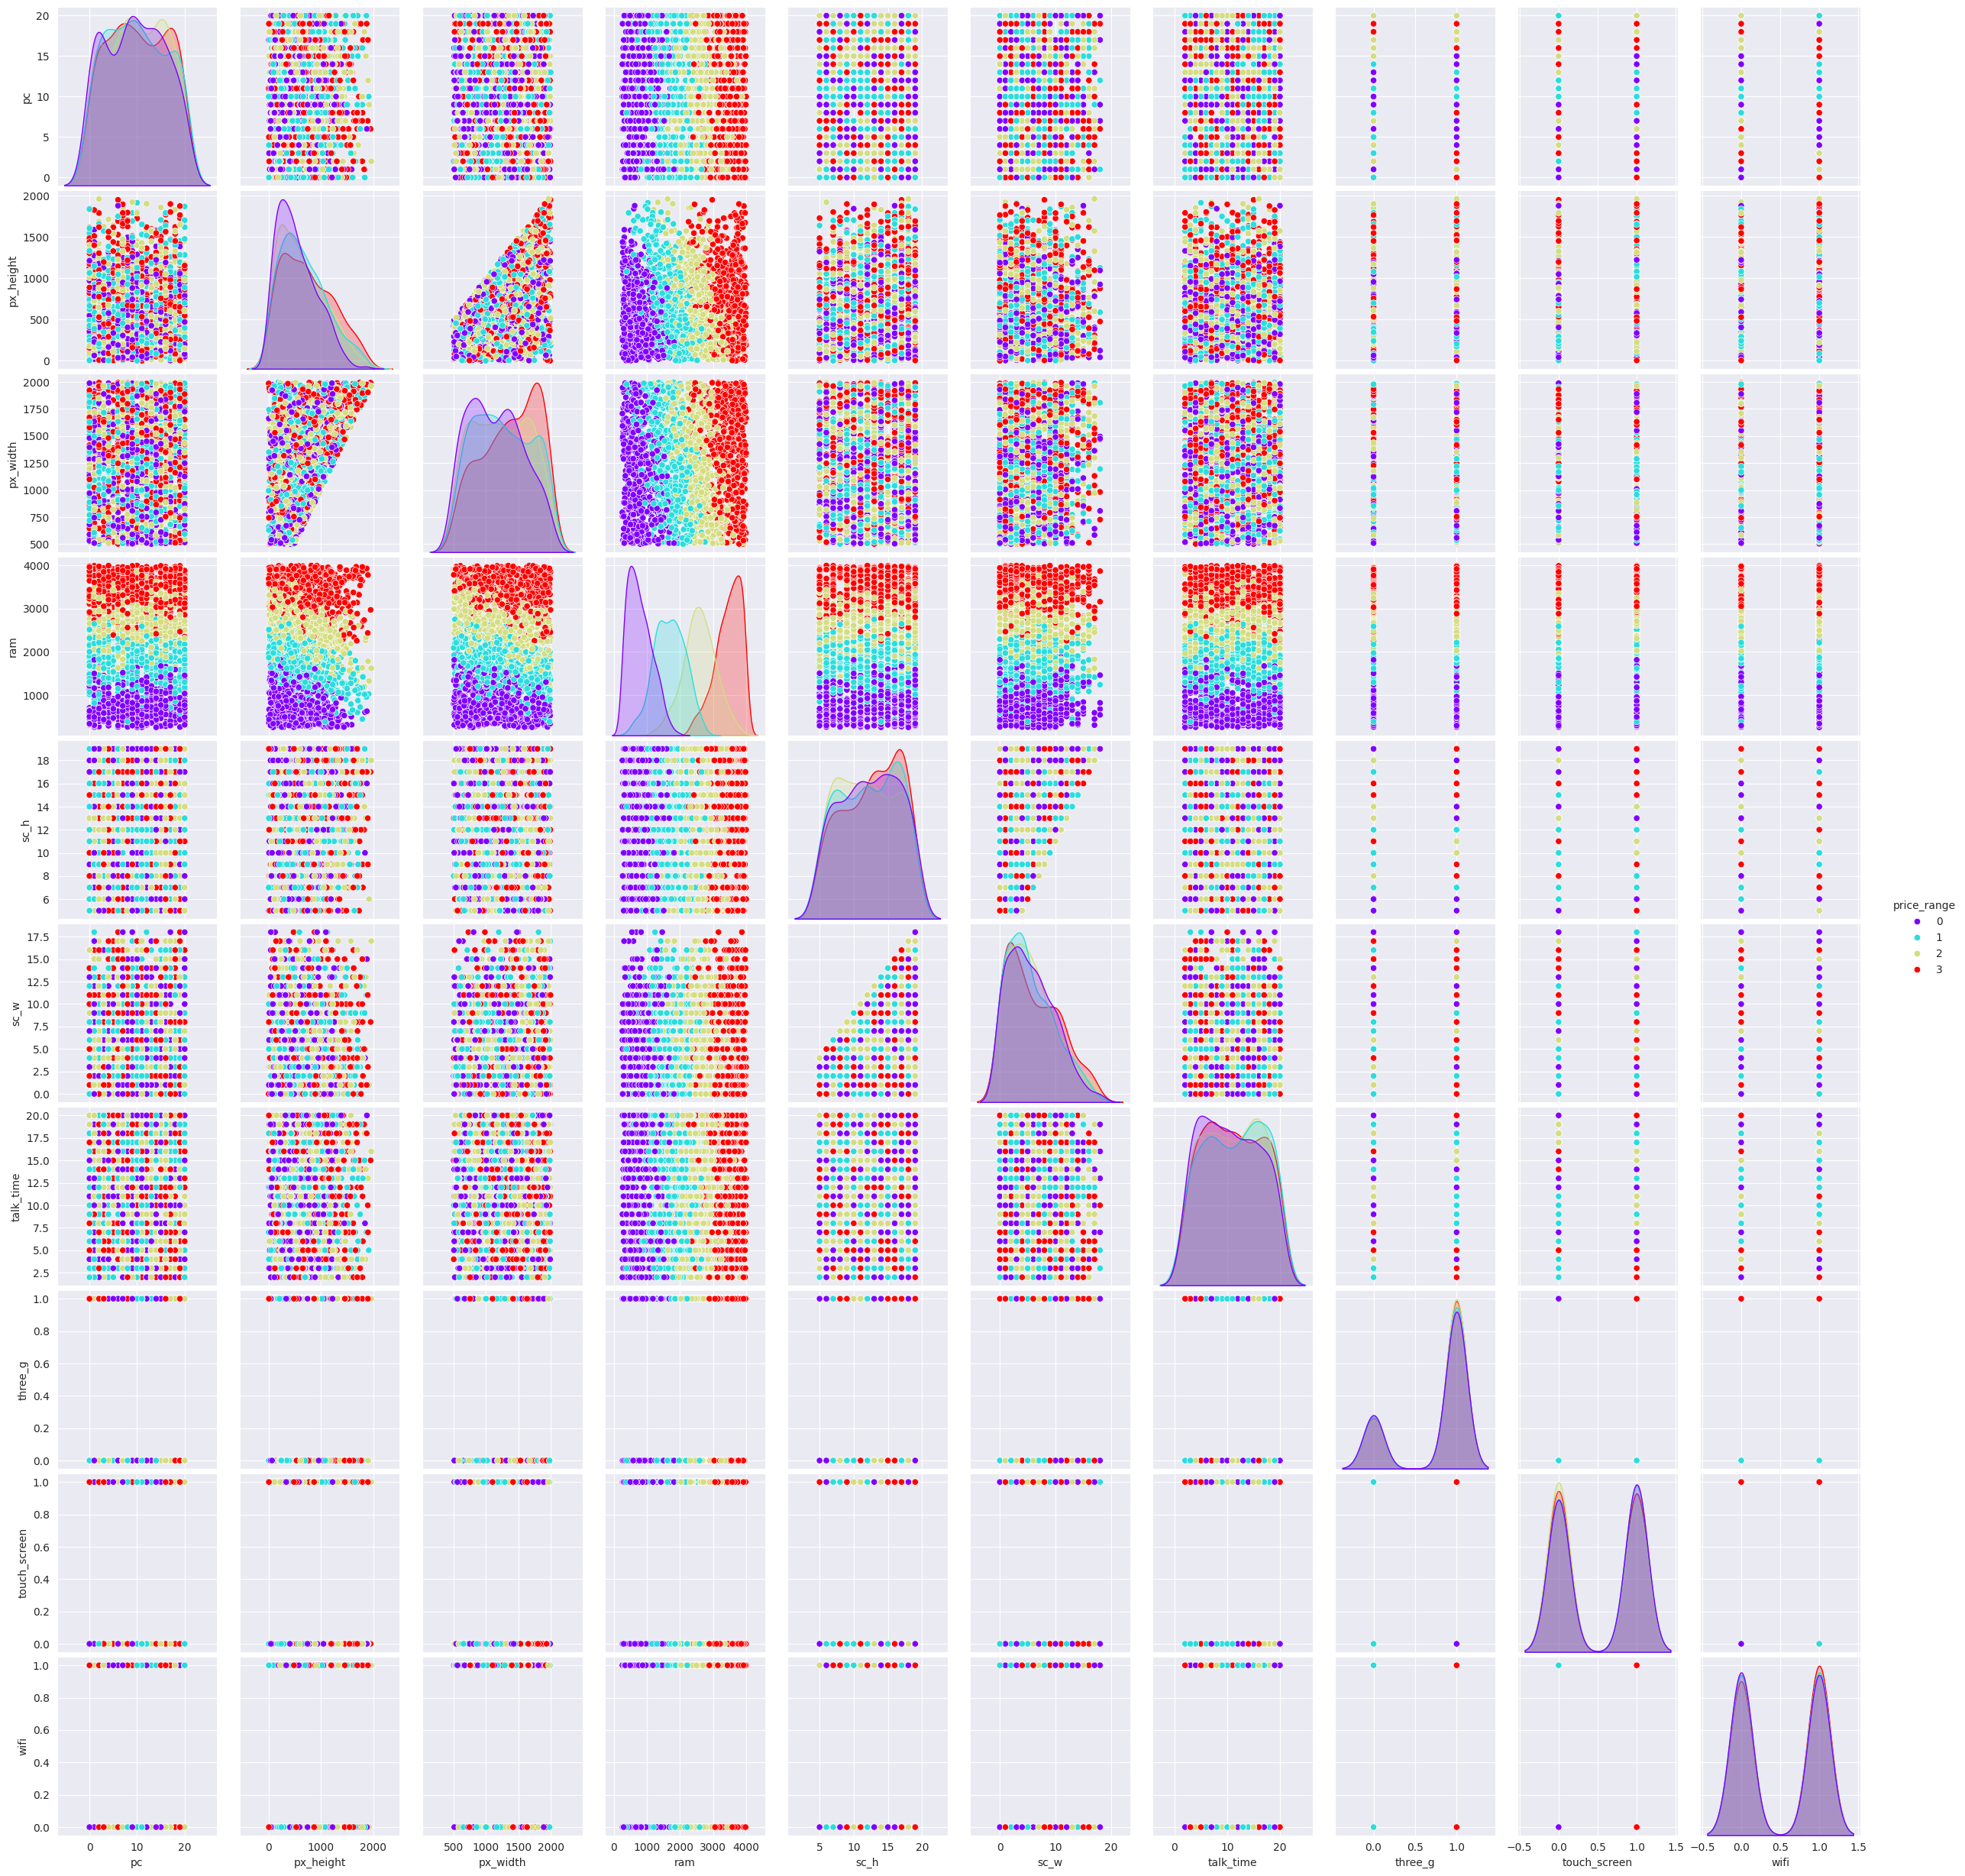

In [19]:
sns.pairplot(df2,hue='price_range',palette='rainbow')
plt.show()

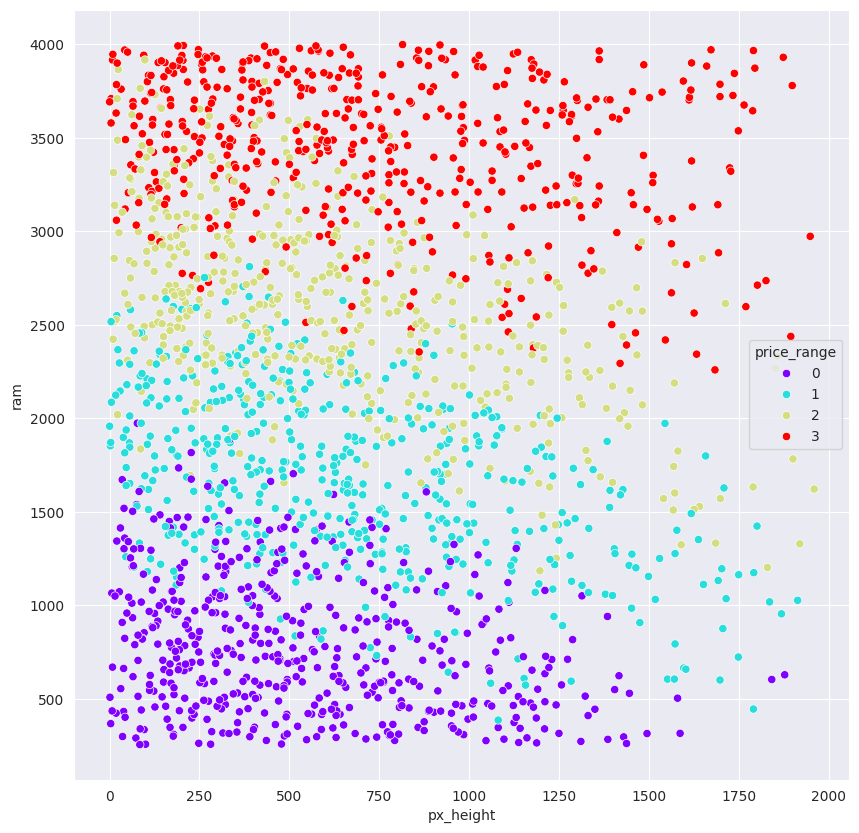

In [22]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='px_height',y='ram',data=train_data,hue='price_range',palette='rainbow')
plt.show()

<Axes: xlabel='n_cores', ylabel='ram'>

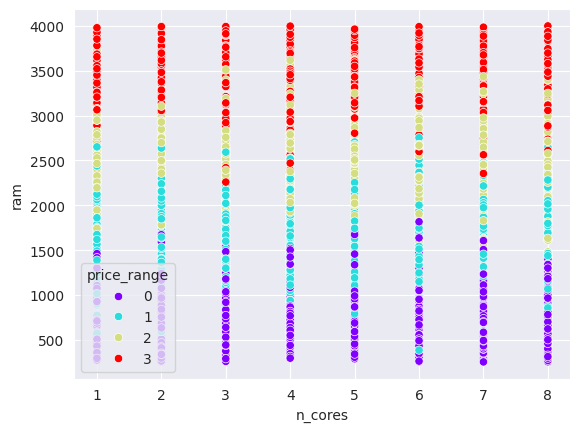

In [23]:
sns.scatterplot(x='n_cores',y='ram',data=train_data,hue='price_range',palette='rainbow')


<Axes: xlabel='sc_h', ylabel='sc_w'>

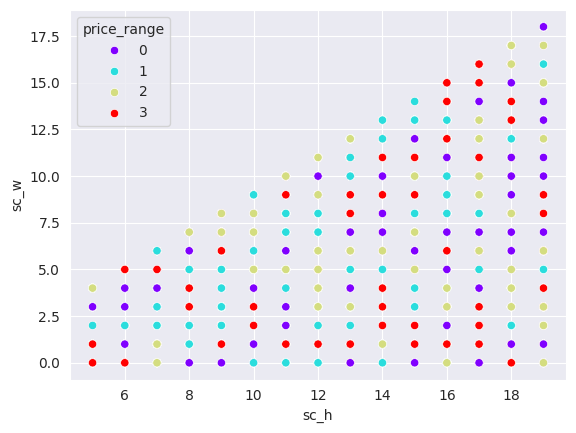

In [24]:
sns.scatterplot(x='sc_h',y='sc_w',data=train_data,hue='price_range',palette='rainbow')


<Axes: xlabel='px_height', ylabel='px_width'>

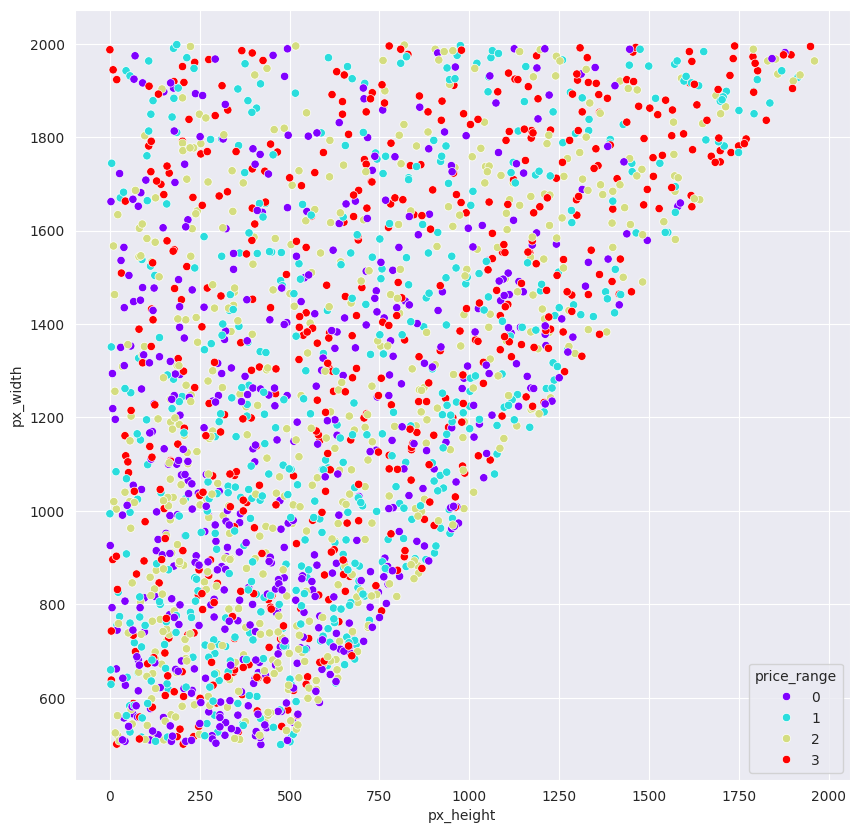

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='px_height',y='px_width',data=train_data,hue='price_range',palette='rainbow')
#

<Axes: xlabel='price_range', ylabel='px_height'>

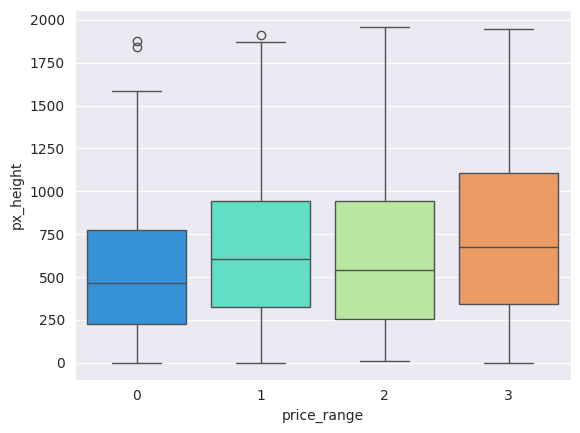

In [26]:
sns.boxplot(x='price_range',y='px_height',data=train_data,palette='rainbow')

<Axes: xlabel='price_range', ylabel='ram'>

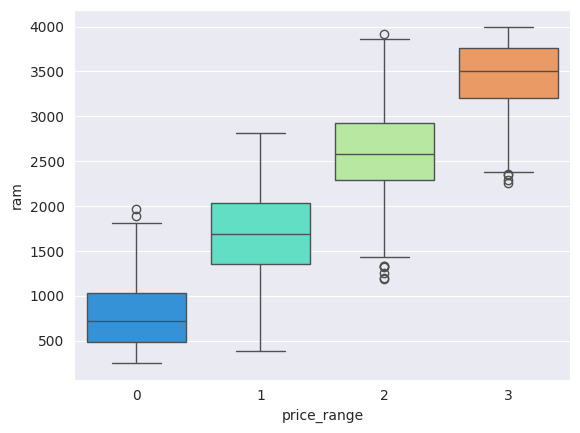

In [32]:
sns.boxplot(x='price_range',y='ram',data=train_data,palette='rainbow')

#model 1

In [43]:
X = train_data[['ram', 'px_height']]  # Create a DataFrame 'x' with columns 'ram' and 'px_height'
y = train_data['price_range']  # Create a Series 'y' with the 'price_range' column

In [44]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function from scikit-learn
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler from scikit-learn
from sklearn.svm import SVC  # Import the Support Vector Classifier (SVC) from scikit-learn
from sklearn.metrics import accuracy_score  # Import the accuracy_score function from scikit-learn

In [45]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=101)


C=1: This parameter controls the regularization strength. A smaller value of C creates a wider margin, allowing for more misclassifications but potentially generalizing better to unseen data. A larger value of C creates a narrower margin, aiming for fewer misclassifications on the training data but possibly overfitting. In this case, C=1 is a moderate regularization strength.
kernel='linear': This parameter specifies the type of kernel function to be used by the SVM. A kernel function defines how the data is transformed into a higher-dimensional space where it might be linearly separable. The 'linear' kernel indicates that a linear hyperplane will be used to separate the data. Other common kernels include 'rbf' (radial basis function), 'poly' (polynomial), and 'sigmoid'.

In [38]:


classifier = SVC(C=1, kernel='linear')

In [46]:
#StandardScaler
sc=StandardScaler()
X_train_Scaled=sc.fit_transform(X_train)
X_valid_Scaled=sc.transform(X_valid)

In [47]:
classifier.fit(X_train_Scaled,y_train)

SVC(C=1, kernel='linear')

In [48]:
y_pred=classifier.predict(X_valid_Scaled)
y_pred

array([1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0,
       3, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 3,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 3, 2, 2,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 0, 1, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 3, 3, 1, 2, 1, 3, 2, 3,
       2, 2, 3, 2, 1, 1, 0, 0, 3, 2, 1, 2, 1, 2, 1, 0, 2, 3, 0, 2, 0, 0,
       3, 0, 0, 2, 3, 2, 1, 3, 0, 3, 1, 2, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1,
       2, 2, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 0, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 2, 3,
       3, 1, 2, 3, 2, 3, 0, 2, 1, 0, 2, 1, 0, 1, 3,

In [49]:
classifier.score(X_train_Scaled,y_train)

0.795

In [50]:
classifier.score(X_valid_Scaled,y_valid)

0.785

#Model 2



In [51]:
classifier2 = SVC(C=1, kernel='rbf')

In [52]:
classifier2.fit(X_train_Scaled,y_train)

SVC(C=1)

In [53]:
classifier2.score(X_train_Scaled,y_train)

0.7975

In [54]:
classifier2.score(X_valid_Scaled,y_valid)

0.7875

#Model 3



In [55]:
X3=train_data.drop('price_range',axis=1)
y3=train_data['price_range']
#

In [56]:
X3_train,X3_valid,y3_train,y3_valid=train_test_split(X3,y3,test_size=0.2,random_state=101)

In [57]:
sc1=StandardScaler()
X3_train_Scaled=sc1.fit_transform(X3_train)
X3_valid_Scaled=sc1.transform(X3_valid)

In [62]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # Define a list of kernels to try
C = [1, 5, 10, 20]  # Define a list of C values to try

for c in C:  # Iterate through each C value
    for i in kernels:  # Iterate through each kernel
        classifer3 = SVC(C=c, kernel=i)  # Create an SVC classifier with the current C and kernel
        classifer3.fit(X3_train_Scaled, y3_train)  # Train the classifier on the training data
        print('For C = {} and kernel = {}'.format(c, i))  # Print the current C and kernel values
        print('Training score', classifer3.score(X3_train_Scaled, y3_train))  # Print the training score
        print('Testing score', classifer3.score(X3_valid_Scaled, y3_valid))  # Print the testing score



For C = 1 and kernel = linear
Training score 0.98
Testing score 0.9425
For C = 1 and kernel = poly
Training score 0.9725
Testing score 0.7625
For C = 1 and kernel = rbf
Training score 0.986875
Testing score 0.8825
For C = 1 and kernel = sigmoid
Training score 0.87
Testing score 0.92
For C = 5 and kernel = linear
Training score 0.984375
Testing score 0.955
For C = 5 and kernel = poly
Training score 0.999375
Testing score 0.765
For C = 5 and kernel = rbf
Training score 1.0
Testing score 0.8825
For C = 5 and kernel = sigmoid
Training score 0.745625
Testing score 0.8825
For C = 10 and kernel = linear
Training score 0.984375
Testing score 0.9575
For C = 10 and kernel = poly
Training score 1.0
Testing score 0.78
For C = 10 and kernel = rbf
Training score 1.0
Testing score 0.885
For C = 10 and kernel = sigmoid
Training score 0.730625
Testing score 0.8725
For C = 20 and kernel = linear
Training score 0.985625
Testing score 0.9575
For C = 20 and kernel = poly
Training score 1.0
Testing score 0.

For C = 1
Training score 0.98
Testing score 0.9425
For C = 6
Training score 0.981875
Testing score 0.9525
For C = 11
Training score 0.984375
Testing score 0.9575
For C = 16
Training score 0.98625
Testing score 0.96
For C = 21
Training score 0.984375
Testing score 0.9575
For C = 26
Training score 0.98625
Testing score 0.955
For C = 31
Training score 0.985625
Testing score 0.955
For C = 36
Training score 0.986875
Testing score 0.96
For C = 41
Training score 0.988125
Testing score 0.96
For C = 46
Training score 0.988125
Testing score 0.9575
For C = 51
Training score 0.988125
Testing score 0.9575
For C = 56
Training score 0.988125
Testing score 0.9575
For C = 61
Training score 0.990625
Testing score 0.96
For C = 66
Training score 0.990625
Testing score 0.9575
For C = 71
Training score 0.99
Testing score 0.9575
For C = 76
Training score 0.989375
Testing score 0.9575
For C = 81
Training score 0.98875
Testing score 0.9575
For C = 86
Training score 0.989375
Testing score 0.9575
For C = 91
Trai

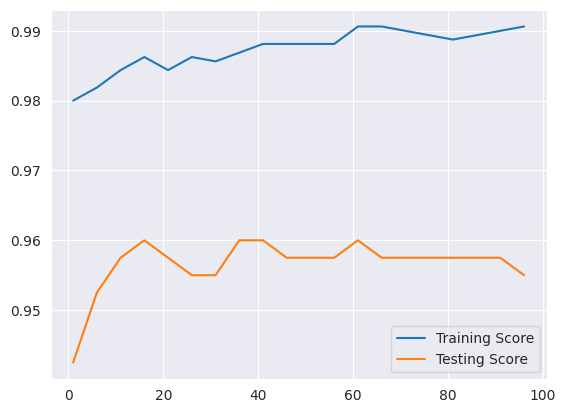

In [64]:
C=[i for i in range(1,100,5)]
Trianing_score=[]
Testing_score=[]
for i in C:
    classifer4=SVC(C=i,kernel='linear')
    classifer4.fit(X3_train_Scaled,y3_train)
    Trianing_score.append(classifer4.score(X3_train_Scaled,y3_train))
    Testing_score.append(classifer4.score(X3_valid_Scaled,y3_valid))
    print('For C = {}'.format(i))
    print('Training score',classifer4.score(X3_train_Scaled,y3_train))
    print('Testing score',classifer4.score(X3_valid_Scaled,y3_valid))
plt.plot(C,Trianing_score,label='Training Score')
plt.plot(C,Testing_score,label='Testing Score')
plt.legend()
#

Best C Value:

The best C value appears to be either 16 or 36.

Reasoning:

Both of these C values achieved the highest testing score of 0.96, indicating good generalization performance on unseen data. While other C values also achieved high testing scores (e.g., 0.9575 for C=11, 21, 46, 51), the values of 16 and 36 stand out as they achieved the absolute peak performance.

Trade-off between Training and Testing:

It's worth noting that the training scores for C=16 and C=36 were also high (0.98625 and 0.986875, respectively), suggesting a good balance between fitting the training data and generalizing to new data